In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [187]:
from sklearn import metrics

In [189]:
import warnings
warnings.filterwarnings("ignore")

In [191]:
dataset = pd.read_csv('Mall_Customers.csv')

In [193]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [194]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [197]:
X = dataset.iloc[:, [3, 4]].values

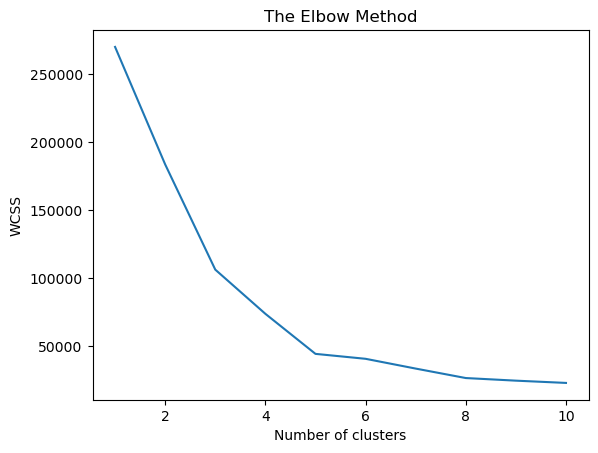

In [199]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [200]:
num_clusters = 5

In [201]:
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)

In [202]:
kmeans.fit(X)

KMeans(n_clusters=5, n_init=10)

In [203]:
pred=kmeans.fit_predict(X)

In [204]:
pred

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2,
       1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 0, 4, 2, 4, 0, 4, 0, 4,
       2, 4, 0, 4, 0, 4, 0, 4, 0, 4, 2, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4])

In [205]:
labels=kmeans.labels_
print(labels)

[1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 2 1 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 4 0 4 2 4 0 4 0 4 2 4 0 4 0 4 0 4 0 4 2 4 0 4 0 4
 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4]


In [206]:
dataset['cluster'] = pd.Series(labels)

In [207]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,3
2,3,Female,20,16,6,1
3,4,Female,23,16,77,3
4,5,Female,31,17,40,1


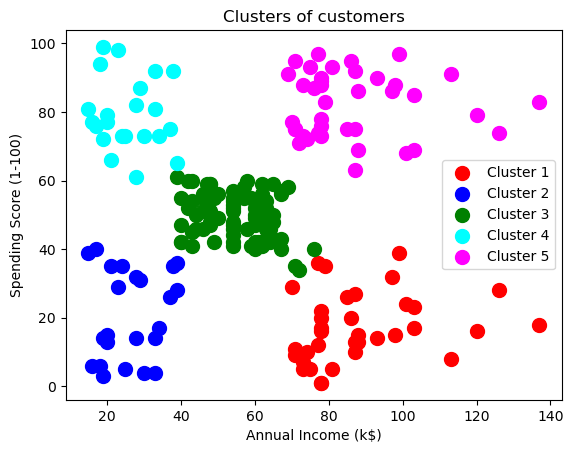

In [208]:
plt.scatter(X[pred == 0, 0], X[pred == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[pred == 1, 0], X[pred == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[pred == 2, 0], X[pred == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[pred == 3, 0], X[pred == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[pred == 4, 0], X[pred == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [209]:
dataset[dataset['cluster']==1]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,1
2,3,Female,20,16,6,1
4,5,Female,31,17,40,1
6,7,Female,35,18,6,1
8,9,Male,64,19,3,1
10,11,Male,67,19,14,1
12,13,Female,58,20,15,1
14,15,Male,37,20,13,1
16,17,Female,35,21,35,1
18,19,Male,52,23,29,1


In [210]:
dataset[dataset['cluster']==2]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
43,44,Female,31,39,61,2
46,47,Female,50,40,55,2
47,48,Female,27,40,47,2
48,49,Female,29,40,42,2
49,50,Female,31,40,42,2
...,...,...,...,...,...,...
121,122,Female,38,67,40,2
122,123,Female,40,69,58,2
126,127,Male,43,71,35,2
132,133,Female,25,72,34,2


In [211]:
dataset[dataset['cluster']==3]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
1,2,Male,21,15,81,3
3,4,Female,23,16,77,3
5,6,Female,22,17,76,3
7,8,Female,23,18,94,3
9,10,Female,30,19,72,3
11,12,Female,35,19,99,3
13,14,Female,24,20,77,3
15,16,Male,22,20,79,3
17,18,Male,20,21,66,3
19,20,Female,35,23,98,3


In [212]:
dataset[dataset['cluster']==4]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
123,124,Male,39,69,91,4
125,126,Female,31,70,77,4
127,128,Male,40,71,95,4
129,130,Male,38,71,75,4
131,132,Male,39,71,75,4
133,134,Female,31,72,71,4
135,136,Female,29,73,88,4
137,138,Male,32,73,73,4
139,140,Female,35,74,72,4
141,142,Male,32,75,93,4


In [213]:
dataset[dataset['cluster']==0]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
124,125,Female,23,70,29,0
128,129,Male,59,71,11,0
130,131,Male,47,71,9,0
134,135,Male,20,73,5,0
136,137,Female,44,73,7,0
138,139,Male,19,74,10,0
140,141,Female,57,75,5,0
144,145,Male,25,77,12,0
146,147,Male,48,77,36,0
148,149,Female,34,78,22,0


In [214]:
# Initialize variables
scores = []
values = np.arange(2, 10)

In [215]:
# Iterate through the defined range
for num_clusters in values:
    # Train the KMeans clustering model
    kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)
    kmeans.fit(X)
    score = metrics.silhouette_score(X, kmeans.labels_, 
                metric='euclidean', sample_size=len(X))

    print("\nNumber of clusters =", num_clusters)
    print("Silhouette score =", score)
                    
    scores.append(score)


Number of clusters = 2
Silhouette score = 0.3956453174399555

Number of clusters = 3
Silhouette score = 0.46761358158775435

Number of clusters = 4
Silhouette score = 0.4931963109249047

Number of clusters = 5
Silhouette score = 0.553931997444648

Number of clusters = 6
Silhouette score = 0.5379675585622219

Number of clusters = 7
Silhouette score = 0.5288104473798049

Number of clusters = 8
Silhouette score = 0.45697007065559897

Number of clusters = 9
Silhouette score = 0.461684164916706



Optimal number of clusters = 5


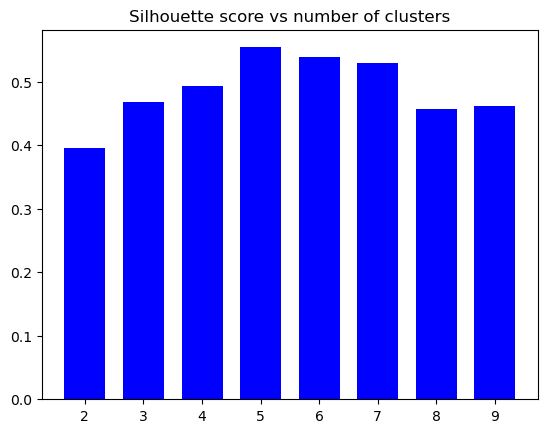

In [216]:
# Plot silhouette scores
plt.figure()
plt.bar(values, scores, width=0.7, color='blue', align='center')
plt.title('Silhouette score vs number of clusters')

# Extract best score and optimal number of clusters
num_clusters = np.argmax(scores) + values[0]
print('\nOptimal number of clusters =', num_clusters)

plt.show()

In [217]:
metrics.calinski_harabasz_score(X, kmeans.labels_)

267.4977051484704

In [218]:
metrics.davies_bouldin_score(X, kmeans.labels_)

0.7388159559364982

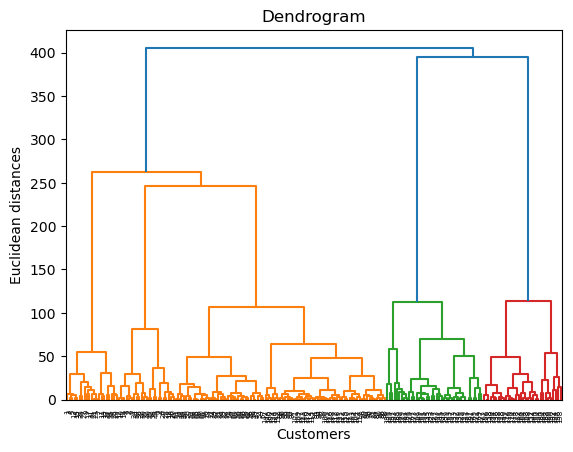

In [219]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [220]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

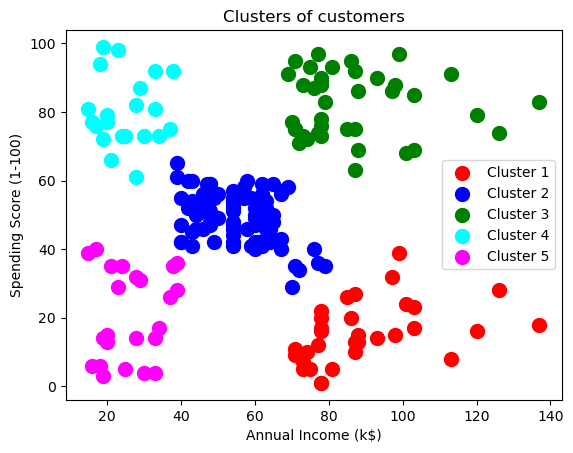

In [221]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [222]:
metrics.silhouette_score(X, y_hc)

0.5529945955148897

In [223]:
metrics.calinski_harabasz_score(X, y_hc)

243.07142892964563

In [224]:
metrics.davies_bouldin_score(X, kmeans.labels_)

0.7388159559364982

Cпособ оценки параметров для DBSCAN заключается в следующем. Вначале нам нужно
понять, какой размер кластера мы будем считать подходящим, чтобы он был выделен, то есть нам
нужно заранее указать значение minPts. Ну например, по каким-то соображениям мы считаем,
что минимум точек в кластере должно быть равно 20. Теперь исходя из этого нужно понять, какое
же значение адекватно выставить. Сделать это нужно следующим образом: нужно посчитать
расстояние для каждой точки от ее minPts-нутого ближайшего соседа. Далее эти расстояния
сортируются по возрастанию и визуализируются. И по полученному графику мы можем примерно
прикинуть, какой нам стоит использовать.

Теперь, для того чтобы посчитать расстояние до minPts-нутого ближайшего соседа, воспользуемся
классом NearestNeighborsиз библиотеки sklearn.

In [226]:
X = (X - X.mean(axis=0))/X.std(axis=0)

In [227]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(n_neighbors=20, algorithm='ball_tree', metric='haversine')

In [228]:
model.fit(X)
dist, _ = model.kneighbors(X, n_neighbors=20, return_distance=True)

In [229]:
dist = dist[:, -1]

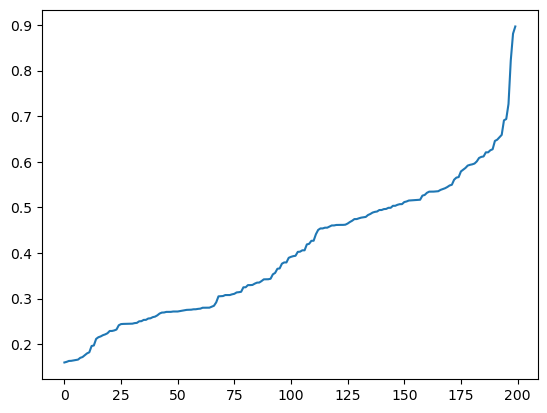

In [230]:
dist = np.sort(dist)
plt.plot(dist)

На этом графике по оси X у нас идет просто число от 0 до 200, а по оси Y отложено расстояние
до minPts-нутого ближайшего соседа. Так вот способ оценивани по этому графику заключается в том, что мы должны выбрать E такой, на котором этот график начинает резко возрастать.

In [232]:
eps = 0.2

In [233]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=20, metric='haversine', algorithm='ball_tree')
dbscan.fit(X)

DBSCAN(algorithm='ball_tree', eps=0.2, metric='haversine', min_samples=20)

Сохраним метки полученных кластеров.

In [238]:
labels = dbscan.labels_

In [239]:
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  1, -1, -1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,
       -1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [240]:
pd.Series(labels).value_counts()

-1    156
 0     24
 1     20
Name: count, dtype: int64

Text(0, 0.5, 'Spending Score (1-100)')

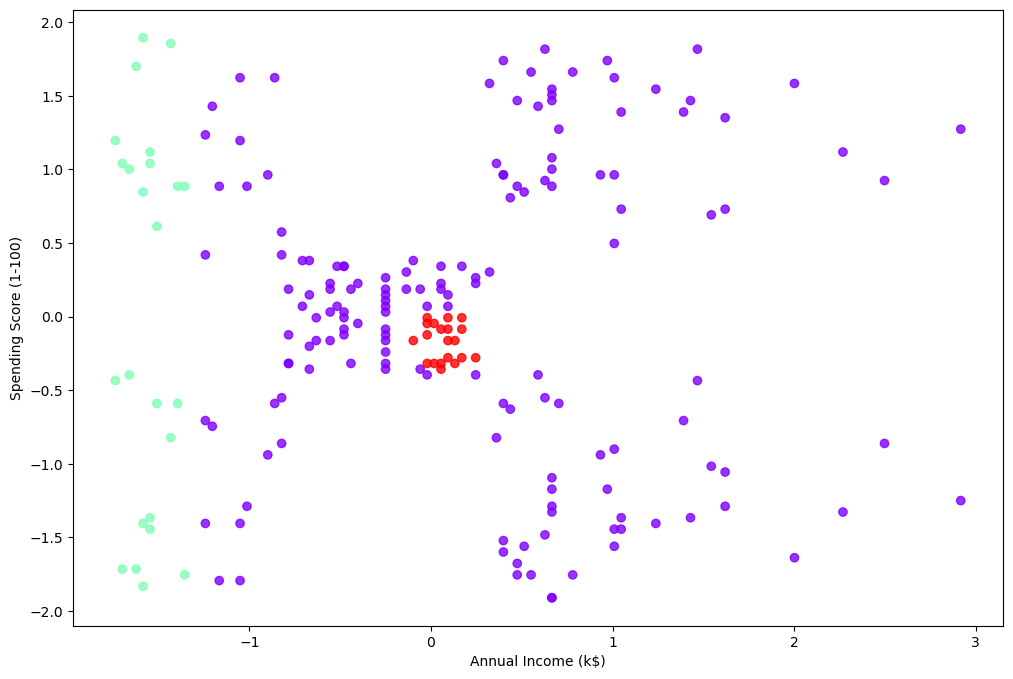

In [242]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0],X[:,1],c=labels,cmap='rainbow', alpha=0.8)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

In [243]:
metrics.silhouette_score(X, labels)

-0.14411721551156392

In [249]:
metrics.calinski_harabasz_score(X, labels)

19.926462941795826

In [256]:
metrics.davies_bouldin_score(X, kmeans.labels_)

0.7407802154747897

In [258]:
eps = 0.4

In [259]:
dbscan = DBSCAN(eps=eps, min_samples=17, metric='haversine', algorithm='ball_tree')
dbscan.fit(X)

DBSCAN(algorithm='ball_tree', eps=0.4, metric='haversine', min_samples=17)

In [260]:
labels = dbscan.labels_

In [261]:
pd.Series(labels).value_counts()

 1    81
 0    45
 3    27
 2    23
 4    11
-1     7
 5     6
Name: count, dtype: int64

Text(0, 0.5, 'Spending Score (1-100)')

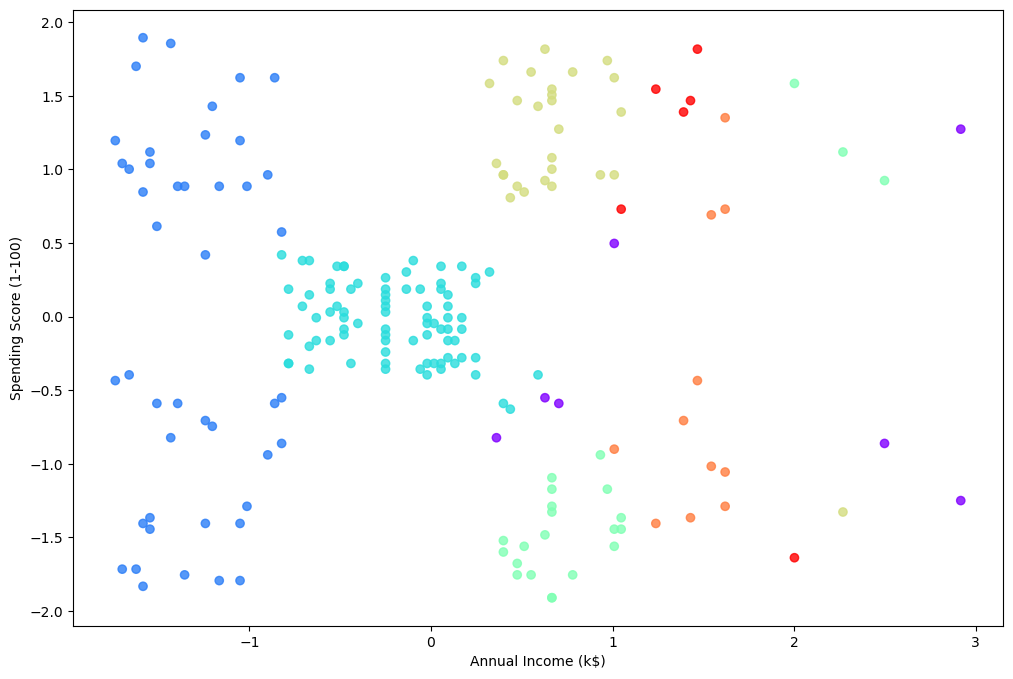

In [262]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0],X[:,1],c=labels,cmap='rainbow', alpha=0.8)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

In [263]:
metrics.silhouette_score(X, labels)

0.33930036191516616

In [264]:
metrics.calinski_harabasz_score(X, labels)

49.579950050621925

In [265]:
metrics.davies_bouldin_score(X, kmeans.labels_)

0.7407802154747897